### 3. ROBUST SCALER

One approach to standardizing input variables in the presence of outliers is to ignore the outliers from the calculation of the mean and standard deviation, then use the calculated values to scale the variable.

This is called robust standardization or robust data scaling.

This can be achieved by calculating the median (50th percentile) and the 25th and 75th percentiles. The values of each variable then have their median subtracted and are divided by the interquartile range (IQR) which is the difference between the 75th and 25th percentiles.

                            FORMULA :
                            value = (value – median) / (p75 – p25)

In [1]:
import pandas as pd
df=pd.read_csv(r'C:\Users\Harsh Jain\Desktop\HARSH JAIN\3. EVERYTHING RELATED TO DATA\DATA SCIENCE\DATASETS\titanic train.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [2]:
df['Age'].fillna(df.Age.median(), inplace=True)

In [3]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.12153846, -1.81546154, -1.50938462, -1.20330769, -0.89723077,
        -0.59115385, -0.28507692,  0.021     ,  0.32707692,  0.63315385,
         0.93923077,  1.24530769,  1.55138462,  1.85746154,  2.16353846,
         2.46961538,  2.77569231,  3.08176923,  3.38784615,  3.69392308,
         4.        ]),
 <a list of 20 Patch objects>)

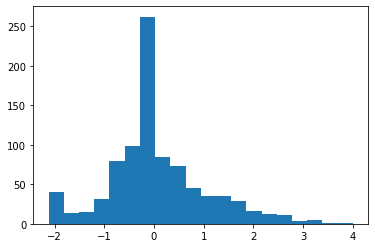

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(df_robust_scaler['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <a list of 20 Patch objects>)

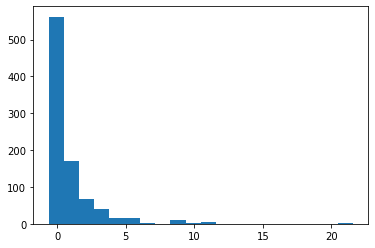

In [5]:
plt.hist(df_robust_scaler['Fare'],bins=20)